In [283]:
#Importing needed modules .
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers , models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [284]:
#Reading csv file and getting 10 sample of that randomly .
path = "D:\\datasets\\college_reviews\\collegereview2021.csv"
file = pd.read_csv(path,index_col=0)
df = file.copy()
df.sample(10)

,Name,college,review,rating
11131,Deepankan Srivastav,SR Institute Of Management and Technology - [S...,There are different types of fests provided he...,9.0
984,HARSH,Dhirubhai Ambani Institute of Information and ...,The total cost of four years of education at o...,9.0
1192,Student (Anonymous),Dr BR Ambedkar National Institute of Technolog...,"UTKANSH, TechNITi, and Bharat Dhwani are the m...",7.7
1297,Mohsin,University of Lucknow - [LU],"From the 5th, and 6th sem students are eligibl...",7.2
17882,Aliya sameena,Vaagdevi College of Engineering - [VCOE],My fee is 86000 as my father is a government e...,8.7
3641,Vaibhav Khater,IIT BHU - Indian Institute of Technology,The name of our annual fest is Kashi yatra whe...,8.3
5965,Harshit Agarwal,R V College of Engineering - [RVCE],students become eligible of appearing for plac...,7.8
16397,VISHAL KUMAR,KR Mangalam University,"Studying law is my passion, as I wanted to stu...",7.3
184,SRABASTI DEB,Guru Nanak Institute of Technology - [GNIT],Every year the annual tech fest tesseract and ...,9.4
16590,Arpit Bansal,Netaji Subhas University of Technology - [NSUT],The annual fest is moksha which has its own na...,8.2


In [285]:
#Droping duplicated samples .
df = df.drop_duplicates()
#Getting information from data frame .
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14449 entries, 0 to 18297
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     14449 non-null  object 
 1   college  14449 non-null  object 
 2   review   14449 non-null  object 
 3   rating   14449 non-null  float64
dtypes: float64(1), object(3)
memory usage: 564.4+ KB


In [286]:
#Seperating labels .
label = df.rating

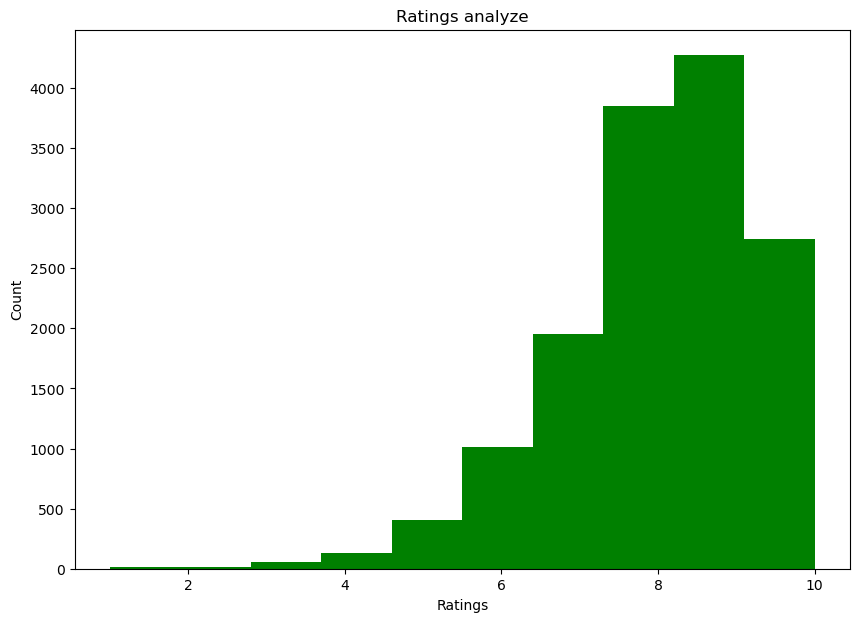

In [287]:
#Plotting a histogram of labels . 
plt.figure(figsize=(10,7))
plt.hist(label,color='green')
plt.title('Ratings analyze')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [288]:
#Creating a function to remove stop words from each text .
def Filter(text)->str:
    '''function docstring'''
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    result = [word for word in text.lower().split() if word not in stopwords]
    return ' '.join(result)

In [289]:
#Seperating features .
features = [Filter(text) for text in df.review]

In [290]:
#Tokenizing reviews and creating a matrix from them .
tokenizer = Tokenizer(oov_token='<00U00>')
tokenizer.fit_on_texts(features)
sequnces = tokenizer.texts_to_sequences(features)
matrix = pad_sequences(sequnces,padding='post',truncating='post',maxlen=30)

In [291]:
#Seperating features and labels to train and valid .
train_x , valid_x , train_y , valid_y = train_test_split(matrix,label,test_size=0.2,random_state=42)

In [292]:
print(f'There are {len(train_x)} texts for train and {len(valid_x)} texts for valid')

There are 11559 texts for train and 2890 texts for valid


In [293]:
#Defining a model by a function .
def Create_model()->None :
    '''function docstring'''
    model = models.Sequential([layers.Embedding(len(tokenizer.word_index)+1,1,input_length=30),
                               layers.Flatten(),
                               layers.Dense(3,activation='relu'),
                              layers.Dense(1)])
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [294]:
#datas train .
history = Create_model().fit(train_x,train_y,epochs = 20 , validation_data = (valid_x,valid_y))

Epoch 1/20
362/362 [==============================] - 1s 1ms/step - loss: 35.6778 - mae: 5.4060 - val_loss: 2.9267 - val_mae: 1.3522
Epoch 2/20
362/362 [==============================] - 0s 1ms/step - loss: 2.4345 - mae: 1.2223 - val_loss: 2.2158 - val_mae: 1.1692
Epoch 3/20
362/362 [==============================] - 0s 1ms/step - loss: 1.9517 - mae: 1.0866 - val_loss: 2.0150 - val_mae: 1.1073
Epoch 4/20
362/362 [==============================] - 0s 1ms/step - loss: 1.7478 - mae: 1.0229 - val_loss: 1.9186 - val_mae: 1.0799
Epoch 5/20
362/362 [==============================] - 0s 1ms/step - loss: 1.6326 - mae: 0.9848 - val_loss: 1.8929 - val_mae: 1.0843
Epoch 6/20
362/362 [==============================] - 0s 1ms/step - loss: 1.5574 - mae: 0.9578 - val_loss: 1.8184 - val_mae: 1.0551
Epoch 7/20
362/362 [==============================] - 0s 1ms/step - loss: 1.4968 - mae: 0.9351 - val_loss: 1.8050 - val_mae: 1.0524
Epoch 8/20
362/362 [==============================] - 0s 1ms/step - loss: 1

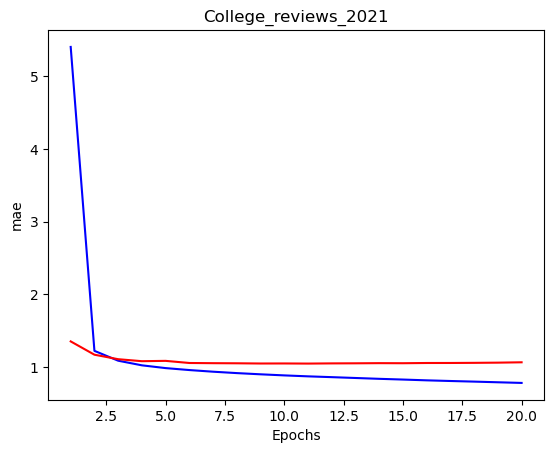

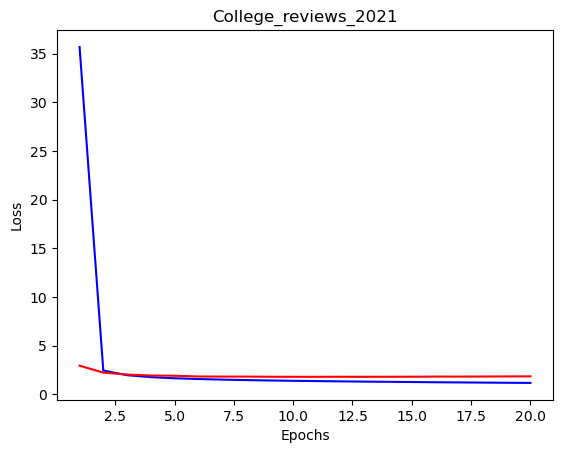

In [296]:
#Visualize models performance
epoch = range(1,21)
results = history.history
plt.plot(epoch,results['mae'],'blue')
plt.plot(epoch,results['val_mae'],'red')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('College_reviews_2021')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('College_reviews_2021')
plt.show()